In [2]:
import pandas as pd

# load datasets
donations = pd.read_csv("donations.csv")
hunger = pd.read_csv("hunger.csv")
wastage = pd.read_csv("food_wastage.csv")

In [3]:
print(donations.head())

            region  donation_amount donation_type        date
0     North Africa          6324.54          food  2025-01-01
1     North Africa          5776.00           NaN  Feb 5 2025
2   Central Africa          5978.00          food  2025/03/01
3  Southern Africa          6789.00         Money         NaN
4     North Africa           438.55          Food  03-25-2025


In [27]:
donations['date'] = pd.to_datetime(donations['date'], errors='coerce')
print(donations.head())

            region  donation_amount donation_type       date
0     North Africa          6324.54          food 2025-01-01
1     North Africa          5776.00           NaN        NaT
2   Central Africa          5978.00          food        NaT
3  Southern Africa          6789.00         Money        NaT
4     North Africa           438.55          Food        NaT


In [4]:
print(hunger.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        415 non-null    object 
 1   hunger_index  351 non-null    float64
 2   population    331 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.8+ KB
None


In [7]:
print(wastage.head())

            region  food_wastage
0  Southern Africa           NaN
1              NaN        3957.8
2      East Africa        2153.0
3              NaN        1914.2
4  Southern Africa           NaN


In [5]:
donations_duplicates = donations.duplicated().sum()
hunger_duplicates = hunger.duplicated().sum()
wastage_duplicates = wastage.duplicated().sum()
print("donation duplicates", donations_duplicates)
print("hunger duplicates", hunger_duplicates)
print("wastage duplicates", wastage_duplicates)

donation duplicates 45
hunger duplicates 59
wastage duplicates 173


In [6]:
print(donations.isnull().sum())

region              72
donation_amount    153
donation_type       64
date                90
dtype: int64


In [7]:
print(wastage.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        422 non-null    object 
 1   food_wastage  322 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.9+ KB
None


In [8]:
print(hunger['region'].unique())

['Southern Africa' 'Central Africa' 'North Africa' nan 'East Africa'
 'West Africa']


In [9]:
# impute
donations['donation_amount'] = donations['donation_amount'].fillna(donations['donation_amount'].median())
print(donations.isnull().sum())

region             72
donation_amount     0
donation_type      64
date               90
dtype: int64


In [11]:
donations.dropna(subset=['region'], inplace=True)
print(donations.isnull().sum())

region              0
donation_amount     0
donation_type      57
date               71
dtype: int64


In [12]:
donations['region'] = donations['region'].str.strip().str.title()
donations.head()

,region,donation_amount,donation_type,date
0,North Africa,6324.54,food,2025-01-01
1,North Africa,5776.00,NaN,Feb 5 2025
2,Central Africa,5978.00,food,2025/03/01
3,Southern Africa,6789.00,Money,NaN
4,North Africa,438.55,Food,03-25-2025


In [21]:
# drop any duplicates

donations = donations.drop_duplicates()
hunger = hunger.drop_duplicates()
wastage = wastage.drop_duplicates()

donations_duplicates = donations.duplicated().sum()
hunger_duplicates = hunger.duplicated().sum()
wastage_duplicates = wastage.duplicated().sum()
print("donation duplicates", donations_duplicates)
print("hunger duplicates", hunger_duplicates)
print("wastage duplicates", wastage_duplicates)

donation duplicates 0
hunger duplicates 0
wastage duplicates 0


In [14]:
# impute

hunger['population'] = hunger['population'].fillna(hunger['population'].median())
hunger['hunger_index'] = hunger['hunger_index'].fillna(hunger['hunger_index'].median())
wastage['food_wastage'] = wastage['food_wastage'].fillna(wastage['food_wastage'].mean())

In [15]:
# Merge donations and hunger data to link donations with hunger levels
combined = pd.merge(donations, hunger, on='region', how='inner') #combine donations and hunger datasets
combined = pd.merge(combined, wastage, on='region', how='inner') # add food wastage per region
combined.head()

,region,donation_amount,donation_type,date,hunger_index,population,food_wastage
0,North Africa,6324.54,food,2025-01-01,40.2,1309791.0,2513.000000
1,North Africa,6324.54,food,2025-01-01,40.2,1309791.0,3607.100000
2,North Africa,6324.54,food,2025-01-01,40.2,1309791.0,3071.584112
3,North Africa,6324.54,food,2025-01-01,40.2,1309791.0,4987.100000
4,North Africa,6324.54,food,2025-01-01,40.2,1309791.0,1914.000000


In [16]:
# Calculate donation_per_capita

combined['donation_per_capita'] = combined['donation_amount']/combined['population']
combined.head()

,region,donation_amount,donation_type,date,hunger_index,population,food_wastage,donation_per_capita
0,North Africa,6324.54,food,2025-01-01,40.2,1309791.0,2513.000000,0.004829
1,North Africa,6324.54,food,2025-01-01,40.2,1309791.0,3607.100000,0.004829
2,North Africa,6324.54,food,2025-01-01,40.2,1309791.0,3071.584112,0.004829
3,North Africa,6324.54,food,2025-01-01,40.2,1309791.0,4987.100000,0.004829
4,North Africa,6324.54,food,2025-01-01,40.2,1309791.0,1914.000000,0.004829


In [17]:
# Categorize regions into "High Need," "Medium Need," and "Low Need" based on hunger index

def categorize_need(hunger_index):
    if hunger_index > 70:
        return "High Need"
    elif hunger_index > 40:
        return "Medium Need"
    else:
        return "Low Need"

combined['need_category'] = combined['hunger_index'].apply(categorize_need)

combined.head()

,region,donation_amount,donation_type,date,hunger_index,population,food_wastage,donation_per_capita,need_category
0,North Africa,6324.54,food,2025-01-01,40.2,1309791.0,2513.000000,0.004829,Medium Need
1,North Africa,6324.54,food,2025-01-01,40.2,1309791.0,3607.100000,0.004829,Medium Need
2,North Africa,6324.54,food,2025-01-01,40.2,1309791.0,3071.584112,0.004829,Medium Need
3,North Africa,6324.54,food,2025-01-01,40.2,1309791.0,4987.100000,0.004829,Medium Need
4,North Africa,6324.54,food,2025-01-01,40.2,1309791.0,1914.000000,0.004829,Medium Need


In [18]:
# Filter for regions with "High Need"

high_need = combined[combined['need_category'] == 'High Need']
print(high_need[['region', 'donation_amount', 'hunger_index']])

               region  donation_amount  hunger_index
225      North Africa          6324.54          89.0
226      North Africa          6324.54          89.0
227      North Africa          6324.54          89.0
228      North Africa          6324.54          89.0
229      North Africa          6324.54          89.0
...               ...              ...           ...
1509543   West Africa          2747.00          77.5
1509544   West Africa          2747.00          77.5
1509545   West Africa          2747.00          77.5
1509546   West Africa          2747.00          77.5
1509547   West Africa          2747.00          77.5

[336124 rows x 3 columns]


In [19]:
# Group data by need category and calculate total donations

grouped = combined.groupby('need_category')['donation_amount'].sum()
print(grouped)

need_category
High Need      1.682332e+09
Low Need       2.549011e+09
Medium Need    3.310187e+09
Name: donation_amount, dtype: float64


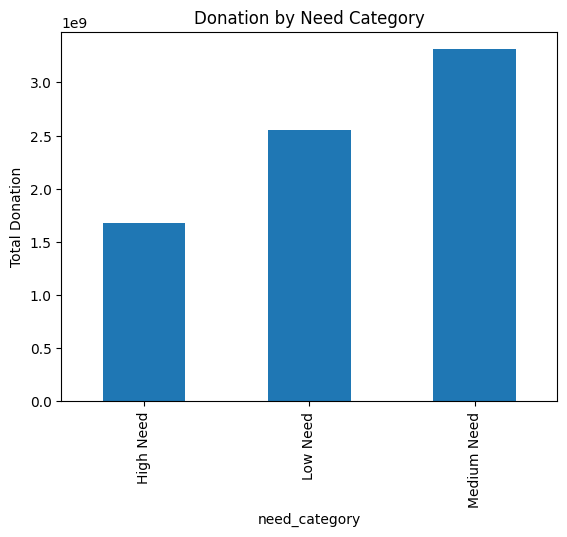

In [20]:
# Plot donations by need category

import matplotlib.pyplot as plt
grouped.plot(kind='bar', title='Donation by Need Category', ylabel='Total Donation')
plt.show()